Plot the decoder results

In [2]:
from scipy.ndimage import gaussian_filter1d
gaussian_filter1d([1.0, 2.0, 3.0, 4.0, 5.0], 1)

import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from peakdetect import peakdetect
import numpy as np
import pandas as pd


In [69]:
fn = r"C:\Users\hagar\OneDrive - mail.tau.ac.il\Desktop\Stage\LPC_2022\Hand decoder\Position\results\predicted_csv\Cinema_pose_estimation_by_frames.csv"#path to csv

df = pd.read_csv(fn)

df['d_xyz'] = np.sqrt((df['d_x']**2)+(df['d_y']**2)+(df['d_z']**2)) # xyz distance


df

,frame,time,predicted_class,prob_selected_class,prob_all_classes,prob_0,prob_1,prob_2,prob_3,prob_4,d_x,d_y,d_z,d_xyz
0,1,0.033,4,0.95,[0. 0. 0. 0.05 0.95],0.00,0.00,0.00,0.05,0.95,0.473456,0.520099,-0.535598,0.884041
1,2,0.066,4,0.95,[0. 0. 0. 0.05 0.95],0.00,0.00,0.00,0.05,0.95,0.473350,0.520150,-0.704769,0.995649
2,3,0.099,4,0.97,[0. 0. 0. 0.03 0.97],0.00,0.00,0.00,0.03,0.97,0.473295,0.520152,-0.664690,0.967667
3,4,0.132,4,0.97,[0. 0. 0. 0.03 0.97],0.00,0.00,0.00,0.03,0.97,0.473342,0.520356,-0.645325,0.954603
4,5,0.165,4,0.97,[0. 0. 0. 0.03 0.97],0.00,0.00,0.00,0.03,0.97,0.473338,0.520356,-0.559934,0.899080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,2.371,4,0.77,[0.09 0.03 0.09 0.02 0.77],0.09,0.03,0.09,0.02,0.77,0.469684,0.516351,-0.736760,1.014907
72,73,2.404,4,0.98,[0. 0. 0. 0.02 0.98],0.00,0.00,0.00,0.02,0.98,0.469326,0.516359,-0.721539,1.003749
73,74,2.437,4,0.98,[0. 0. 0. 0.02 0.98],0.00,0.00,0.00,0.02,0.98,0.469267,0.516634,-0.740031,1.017235
74,75,2.470,4,0.98,[0. 0. 0. 0.02 0.98],0.00,0.00,0.00,0.02,0.98,0.469232,0.516676,-0.777518,1.044829


[array([59.        ,  0.87353762]), array([21.        ,  0.98052003]), array([42.        ,  0.98802912])]


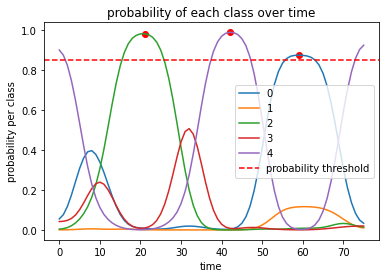

In [156]:
time = df['time']
prob_0 = df['prob_0']
prob_1 = df['prob_1']
prob_2 = df['prob_2']
prob_3 = df['prob_3']
prob_4 = df['prob_4']

probs = [prob_0,prob_1,prob_2,prob_3,prob_4]

peaks_to_display =[]
    
for i in range(len(probs)):
    y3 = gaussian_filter1d(probs[i], 3)
    peaks = peakdetect(list(y3), lookahead=4)
    higherPeaks = np.array(peaks[0])
    #
    for peak in higherPeaks:
        if peak[1]> 0.85:
            peaks_to_display.append(peak)
    plt.plot(y3,label = f'{i}')
    # plt.plot(higherPeaks[:,0], higherPeaks[:,1], 'ro')

print(list(peaks_to_display))
# not the best solution, just for now:

x = [59,21,42]
y = [0.87353762,0.98052003,0.98802912]

plt.scatter(x, y, c='r')

# naming the x axis
plt.xlabel('time')
# naming the y axis
plt.ylabel('probability per class')
# title to the graph
plt.title('probability of each class over time')
plt.axhline(y=0.85, color='r', linestyle='--', label = 'probability threshold')


plt.legend()
plt.show()

    




In [117]:
peaks = peakdetect(list(y3), lookahead=4)
print(peaks[0][0][1])
if peaks[0][0][1] > 0.85:
 

[[8, 0.3962390834199396], [32, 0.019241785253637286], [59, 0.8735376242397139]]


False

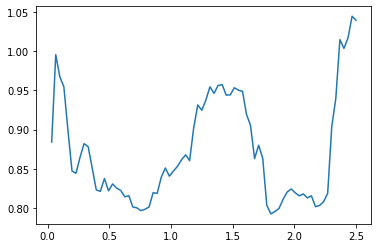

In [12]:
plt.plot(df['time'],df['d_xyz'])

[[42.          0.94646622]]


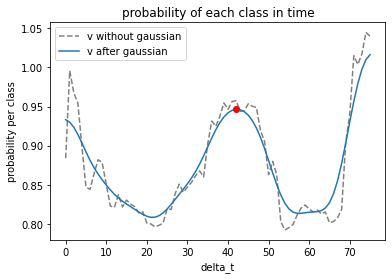

In [25]:
y3 = gaussian_filter1d(df['d_xyz'], 3)



peaks = peakdetect(list(y3), lookahead=2) 
# Lookahead is the distance to look ahead from a peak to determine if it is the actual peak. 
# Change lookahead as necessary 
higherPeaks = np.array(peaks[0])

plt.plot(df['d_xyz'],'--',color = 'grey',label = 'v without gaussian')
plt.plot(y3,label = 'v after gaussian')

plt.plot(higherPeaks[:,0], higherPeaks[:,1], 'ro')
# plt.plot(lowerPeaks[:,0], lowerPeaks[:,1], 'ro')
plt.legend()
# naming the x axis
plt.xlabel('delta_t')
# naming the y axis
plt.ylabel('probability per class')
# title to the graph
plt.title('probability of each class in time')

print(higherPeaks)